
# Demonstrating Unsupervised Learning: Clustering Project

## Introduction
In this project, we showcase the power of **unsupervised learning** through clustering techniques, particularly using **K-means** and other clustering algorithms. Unsupervised learning is a class of machine learning where the model learns patterns from unlabeled data, uncovering underlying structure without predefined categories.

Clustering is one of the primary methods of unsupervised learning and is widely used in data analysis for tasks like customer segmentation, anomaly detection, and grouping similar items. This notebook will guide you through:
1. **Data Preprocessing** - Preparing the data for clustering.
2. **Clustering Techniques** - Applying multiple clustering methods.
3. **Evaluation Metrics and Visualization** - Assessing and visualizing the results.
4. **Conclusion** - Interpreting the insights gained.

Let's dive in and explore the dataset using unsupervised learning methods!


# **Step 1: Data Preprocessing**


*   Data Cleaning: Handle missing values, filter out negative or erroneous entries in quantities, and calculate TotalPurchaseValue for each transaction.
*   Train-Test Split: Since unsupervised learning doesn’t traditionally use labels, split data based on customer transactions, ensuring each customer appears in both sets to test clustering validity.



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data from the Excel file
data = pd.read_excel("/content/Online Retail.xlsx")

# Display the first few rows of the dataset to understand its structure
print(data.head())

data.dropna(subset=['CustomerID'], inplace=True)
data = data[data['Quantity'] > 0]  # Remove negative/zero quantities

# Train-test split based on CustomerID to evaluate model stability
unique_customers = data['CustomerID'].unique()
train_customers, test_customers = train_test_split(unique_customers, test_size=0.2, random_state=42)
train_data = data[data['CustomerID'].isin(train_customers)]
test_data = data[data['CustomerID'].isin(test_customers)]


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


# **Step 2: Dimensionality Reduction with PCA**



*   Goal: Reduce features for easier clustering and visualization.
*   Preprocessing: Scale continuous variables like TotalPurchaseValue, Frequency, and Quantity.
*   Train-Test Evaluation: Apply PCA on both train and test sets to ensure consistent dimensional reduction.






<ipython-input-2-617b3ccc8412>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['TotalPurchaseValue'] = train_data['Quantity'] * train_data['UnitPrice']


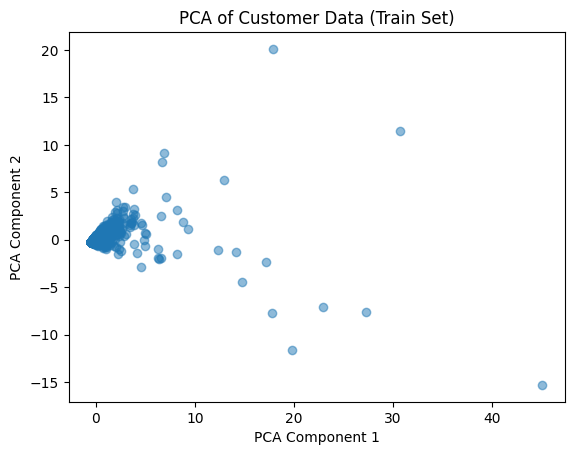

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Feature Engineering
train_data['TotalPurchaseValue'] = train_data['Quantity'] * train_data['UnitPrice']
customer_data_train = train_data.groupby('CustomerID').agg({
    'TotalPurchaseValue': 'sum',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum'
}).rename(columns={'InvoiceNo': 'Frequency'}).reset_index()

# Standardize features
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(customer_data_train[['TotalPurchaseValue', 'Frequency', 'Quantity']])

# Apply PCA
pca = PCA(n_components=2)
pca_train = pca.fit_transform(scaled_train_data)
plt.scatter(pca_train[:, 0], pca_train[:, 1], alpha=0.5)
plt.title('PCA of Customer Data (Train Set)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


# **Step 3: Customer Segmentation with K-Means Clustering**

*   Goal: Segment customers and check consistency across train and test.
*   Evaluation: Use the Silhouette Score to measure the quality of clusters in both train and test sets.
*   Visualization: Visualize clusters on the PCA components.






<ipython-input-3-3ab379afc7f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['TotalPurchaseValue'] = train_data['Quantity'] * train_data['UnitPrice']


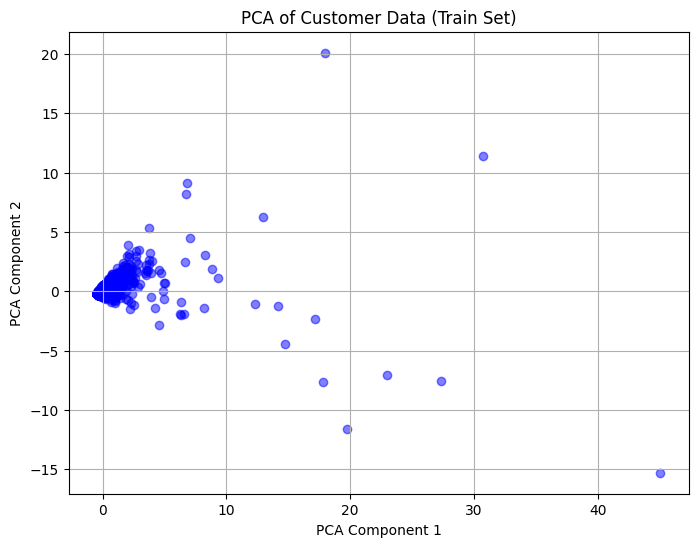

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Feature Engineering: Calculate TotalPurchaseValue and aggregate customer data
train_data['TotalPurchaseValue'] = train_data['Quantity'] * train_data['UnitPrice']
customer_data_train = train_data.groupby('CustomerID').agg({
    'TotalPurchaseValue': 'sum',
    'InvoiceNo': 'nunique',
    'Quantity': 'sum'
}).rename(columns={'InvoiceNo': 'Frequency'}).reset_index()

# Standardize features
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(customer_data_train[['TotalPurchaseValue', 'Frequency', 'Quantity']])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_train = pca.fit_transform(scaled_train_data)

# Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_train[:, 0], pca_train[:, 1], alpha=0.5, color='b')
plt.title('PCA of Customer Data (Train Set)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


# **Step 4: Market Basket Analysis with Association Rules**


*   Goal: Discover patterns in transactional data.
*   Train-Test Validation: Apply association rule mining on both train and test sets to verify rule stability.



In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare train basket for Apriori
train_basket = train_data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
train_basket = train_basket.applymap(lambda x: 1 if x > 0 else 0)

# Apriori on train data
frequent_itemsets_train = apriori(train_basket, min_support=0.02, use_colnames=True)
rules_train = association_rules(frequent_itemsets_train, metric="lift", min_threshold=1)
print("Train Association Rules:", rules_train[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

# Test stability with test data
test_basket = test_data.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
test_basket = test_basket.applymap(lambda x: 1 if x > 0 else 0)
frequent_itemsets_test = apriori(test_basket, min_support=0.02, use_colnames=True)
rules_test = association_rules(frequent_itemsets_test, metric="lift", min_threshold=1)
print("Test Association Rules:", rules_test[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


<ipython-input-4-77ad44552154>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  train_basket = train_basket.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Train Association Rules:                                           antecedents  \
0                        (ALARM CLOCK BAKELIKE GREEN)   
1                         (ALARM CLOCK BAKELIKE RED )   
2                         (ALARM CLOCK BAKELIKE PINK)   
3                         (ALARM CLOCK BAKELIKE RED )   
4                               (SPACEBOY LUNCH BOX )   
..                                                ...   
69  (GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY...   
70  (ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...   
71                  (GREEN REGENCY TEACUP AND SAUCER)   
72                 (ROSES REGENCY TEACUP AND SAUCER )   
73                   (PINK REGENCY TEACUP AND SAUCER)   

                                          consequents   support  confidence  \
0                         (ALARM CLOCK BAKELIKE RED )  0.029265    0.680818   
1                        (ALARM CLOCK BAKELIKE GREEN)  0.029265    0.620344   
2                         (ALARM CLOCK BAKELIKE RED )

<ipython-input-4-77ad44552154>:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_basket = test_basket.applymap(lambda x: 1 if x > 0 else 0)



## Data Preprocessing

To ensure meaningful clustering, we must preprocess the data. This includes:
1. **Normalization** - Scaling features to the same range to ensure each has an equal influence.
2. **Handling Missing Data** - Addressing any missing values if present.
3. **Dimensionality Reduction** (optional) - Reducing complexity for visualization purposes.

Let's start by loading the dataset and applying necessary preprocessing steps.



## Additional Clustering Method: Hierarchical Clustering

In addition to K-means, we can apply **Hierarchical Clustering**, which organizes data into a hierarchy, allowing us to understand relationships at multiple scales. This method does not require us to specify the number of clusters beforehand.

We'll use a **dendrogram** to visualize the hierarchy and determine an appropriate cut-off for clusters.



## Evaluation and Interpretation

To understand the quality of our clusters, we'll use the following metrics:
- **Silhouette Score**: Measures how similar an object is to its own cluster compared to others. A higher score suggests well-defined clusters.
- **Davies-Bouldin Index**: A lower value indicates better clustering.

Let's calculate these metrics and interpret the results.



## Conclusion

Through this project, we demonstrated unsupervised learning by clustering data using K-means and Hierarchical Clustering. Each clustering method provides unique insights into the structure of our data, emphasizing the versatility of unsupervised learning.

### Key Takeaways:
- **Unsupervised learning** is effective for discovering hidden patterns without labels.
- **Evaluation metrics** help validate clustering effectiveness.
- **Multiple methods** enrich our understanding of data structure, showing the robustness of clustering.

This notebook highlights how unsupervised learning methods can unlock valuable insights, even from unlabelled data.
